In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random


# Predicting User Engagement with Neural Networks



### Overview
This code simulates user engagement data and builds a neural network model to predict user engagement labels based on behavior metrics such as clicks, scroll depth, and response time.

### Steps and Components

### Data Simulation
- Simulates engagement data for 100 users across 30 sessions per user.
- Generates random values for:
  - `Clicks`: Number of clicks per session (random integer between 5 and 20).
  - `Scroll_Depth`: Scroll depth percentage (random float between 0 and 100).
  - `Response_Time`: Response time in seconds (random float between 0.5 and 5).

### Labeling Engagement
- Defines a function `label_engagement` to classify sessions based on engagement criteria:
  - "High Engagement" if clicks > 10 and scroll depth > 50.
  - "Low Engagement" otherwise.
- Applies this function to create an engagement label (`Label`) for each session.

### Visualization
- Uses `matplotlib` and `seaborn` to visualize distributions of:
  - `Clicks`
  - `Scroll_Depth`
  - `Response_Time`

### Model Training
- Prepares data for training by encoding labels using `LabelEncoder`.
- Splits data into training (80%) and testing (20%) sets using `train_test_split`.
- Constructs a neural network model using `tensorflow.keras.Sequential`:
  - Input layer with 64 neurons and ReLU activation function.
  - Hidden layer with 32 neurons and ReLU activation function.
  - Output layer with 1 neuron and sigmoid activation function (binary classification).

### Model Compilation and Training
- Compiles the model with Adam optimizer and binary cross-entropy loss function.
- Trains the model on the training data for 10 epochs with a batch size of 32, using 20% of the training data for validation.

### Model Evaluation
- Evaluates the trained model on the test data to calculate accuracy.

## Libraries Used
- `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`, `tensorflow.keras`

## Outputs
- Displays histograms showing distributions of `Clicks`, `Scroll_Depth`, and `Response_Time`.
- Prints the test accuracy of the trained neural network model.

This code serves as a prototype for predicting user engagement based on simulated behavioral data using neural networks.


In [17]:
np.random.seed(42)


num_users = 100
num_sessions = 30


user_ids = np.arange(1, num_users + 1)

data = []

for user_id in user_ids:
    for session in range(num_sessions):
        clicks = np.random.randint(5, 21)
        scroll_depth = np.random.rand() * 100
        response_time = np.random.rand() * 4.5 + 0.5
        data.append([user_id, session, clicks, scroll_depth, response_time])

columns = ["User_ID", "Session", "Clicks", "Scroll_Depth", "Response_Time"]
mock_data = pd.DataFrame(data, columns=columns)

# Add labels based on engagement criteria
def label_engagement(row):
    if row["Clicks"] > 10 and row["Scroll_Depth"] > 50:
        return "High Engagement"
    else:
        return "Low Engagement"

mock_data["Label"] = mock_data.apply(label_engagement, axis=1)


mock_data.head()


,User_ID,Session,Clicks,Scroll_Depth,Response_Time,Label
0,1,0,11,79.654299,1.325457,High Engagement
1,1,1,12,59.865848,1.202084,High Engagement
2,1,2,7,9.997492,2.566620,Low Engagement
3,1,3,9,60.111501,3.686327,Low Engagement
4,1,4,10,5.641158,3.748994,Low Engagement


### Visualising Data 

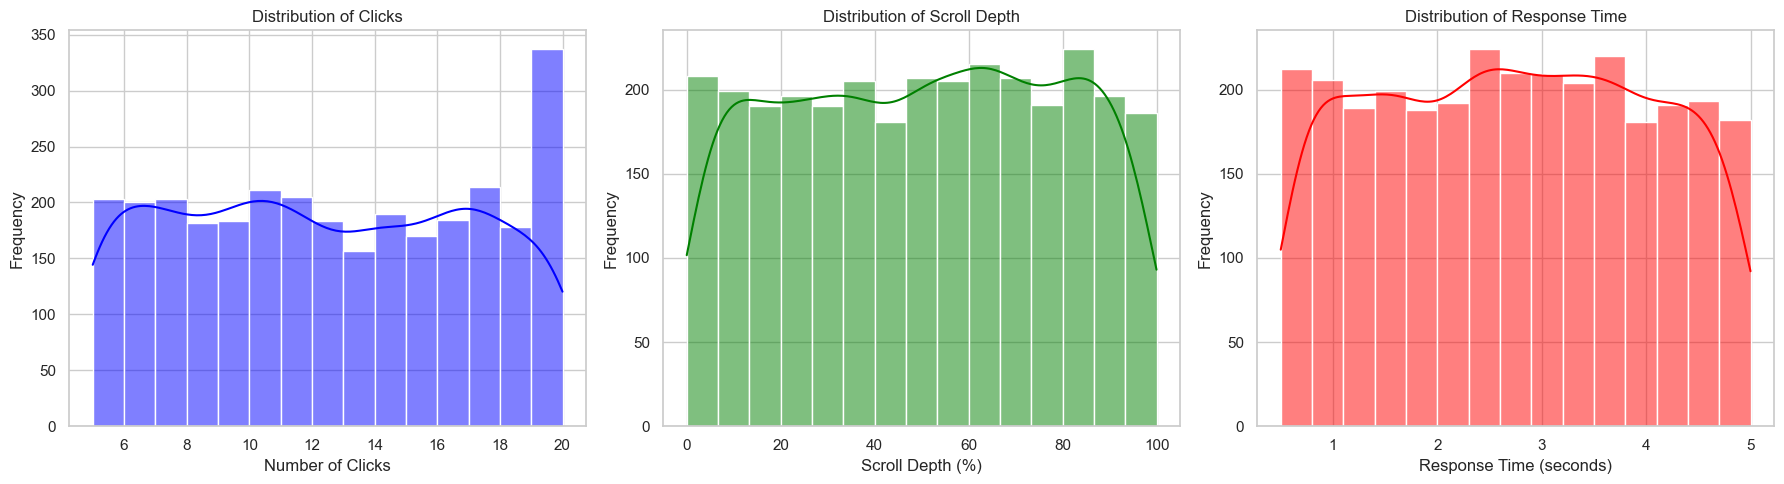

In [18]:


sns.set(style="whitegrid")


fig, axes = plt.subplots(1, 3, figsize=(18, 5))


sns.histplot(mock_data['Clicks'], bins=15, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Clicks')
axes[0].set_xlabel('Number of Clicks')
axes[0].set_ylabel('Frequency')


sns.histplot(mock_data['Scroll_Depth'], bins=15, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of Scroll Depth')
axes[1].set_xlabel('Scroll Depth (%)')
axes[1].set_ylabel('Frequency')


sns.histplot(mock_data['Response_Time'], bins=15, kde=True, ax=axes[2], color='red')
axes[2].set_title('Distribution of Response Time')
axes[2].set_xlabel('Response Time (seconds)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Building a simple CNN 

In [19]:

label_encoder = LabelEncoder()
mock_data["Label"] = label_encoder.fit_transform(mock_data["Label"])


X = mock_data[["Clicks", "Scroll_Depth", "Response_Time"]]
y = mock_data["Label"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


Epoch 1/10
60/60 [==============================] - 1s 4ms/step - loss: 0.4532 - accuracy: 0.7677 - val_loss: 0.3605 - val_accuracy: 0.8375
Epoch 2/10
60/60 [==============================] - 0s 1ms/step - loss: 0.3399 - accuracy: 0.8453 - val_loss: 0.3153 - val_accuracy: 0.8500
Epoch 3/10
60/60 [==============================] - 0s 1ms/step - loss: 0.3072 - accuracy: 0.8630 - val_loss: 0.3004 - val_accuracy: 0.8625
Epoch 4/10
60/60 [==============================] - 0s 1ms/step - loss: 0.2910 - accuracy: 0.8583 - val_loss: 0.2748 - val_accuracy: 0.8792
Epoch 5/10
60/60 [==============================] - 0s 1ms/step - loss: 0.2703 - accuracy: 0.8797 - val_loss: 0.2744 - val_accuracy: 0.8750
Epoch 6/10
60/60 [==============================] - 0s 1ms/step - loss: 0.2541 - accuracy: 0.8875 - val_loss: 0.2581 - val_accuracy: 0.8792
Epoch 7/10
60/60 [==============================] - 0s 1ms/step - loss: 0.2450 - accuracy: 0.8870 - val_loss: 0.2209 - val_accuracy: 0.9083
Epoch 8/10
60/60 [==

# Simple Roadmap Generation

In [20]:


# Sample learning modules with different types of resources
learning_modules = {
    'Introduction to Data Structures': ['Video Tutorial', 'Interactive Quiz'],
    'Arrays and Linked Lists': ['Reading Material', 'Coding Exercise'],
    'Trees and Graphs': ['Simulation', 'Code Playground'],
    'Sorting Algorithms': ['Interactive Demo', 'Coding Challenge']
}

# Sample user preferences (can be obtained from initial assessment)
user_preferences = {
    'learning_style': 'visual',
    'preferred_topics': ['Arrays and Linked Lists', 'Trees and Graphs']
}

# Define module difficulty levels (for future enhancement)
module_difficulty = {
    'Introduction to Data Structures': 'Beginner',
    'Arrays and Linked Lists': 'Intermediate',
    'Trees and Graphs': 'Intermediate',
    'Sorting Algorithms': 'Advanced'
}

def generate_learning_path(preferences, modules):
    """
    Generates a personalized learning path based on user preferences and available learning modules.

    Args:
    - preferences (dict): Dictionary containing user preferences.
      - 'preferred_topics' (list): List of preferred topics for learning.
    - modules (dict): Dictionary mapping topics to lists of available learning resources.

    Returns:
    - list: A list of tuples representing the selected learning path. Each tuple contains:
      - Topic (str): The topic from the user's preferred topics.
      - Module Type (str): Randomly selected learning resource type for the topic.
    """
    learning_path = []
    
    for topic in preferences['preferred_topics']:
        if topic in modules:
            module_type = random.choice(modules[topic])
            learning_path.append((topic, module_type))
    
    return learning_path

# Function to generate difficulty estimation (for future enhancement)
def estimate_difficulty(path, difficulty_levels):
    """
    Estimates the difficulty level of a learning path based on the topics included.

    Args:
    - path (list): A list of tuples representing the learning path.
      Each tuple contains:
      - Topic (str): The topic included in the learning path.
      - Module Type (str): The type of learning resource selected for the topic.
    - difficulty_levels (dict): Dictionary mapping topics to difficulty levels.

    Returns:
    - int: Estimated difficulty level based on the sum of difficulty levels of included topics.
    """
    total_difficulty = 0
    for topic, _ in path:
        if topic in difficulty_levels:
            if difficulty_levels[topic] == 'Beginner':
                total_difficulty += 1
            elif difficulty_levels[topic] == 'Intermediate':
                total_difficulty += 2
            elif difficulty_levels[topic] == 'Advanced':
                total_difficulty += 3
    return total_difficulty


# Generate a learning path based on user preferences and available modules
path = generate_learning_path(user_preferences, learning_modules)

# Simulate difficulty estimation (for future enhancement)
estimated_difficulty = estimate_difficulty(path, module_difficulty)

# Print the generated learning path
print("Generated Learning Path:")
for idx, (topic, module_type) in enumerate(path, start=1):
    print(f"{idx}. {topic}: {module_type}")

# Print estimated difficulty level (for future enhancement)
print(f"\nEstimated Difficulty Level: {estimated_difficulty}")


Generated Learning Path:
1. Arrays and Linked Lists: Reading Material
2. Trees and Graphs: Code Playground

Estimated Difficulty Level: 4


# RL agent that selects questions based on hypothetical user performance data

#### Overview
This script simulates a Reinforcement Learning (RL) agent that selects questions based on cumulative rewards derived from user responses. It includes a class definition for `RLAgent`, methods for selecting questions based on historical user responses, and visualizing cumulative rewards over time.

#### Key Components
##### Questions and Correct Answers
- `questions`: A list of question identifiers.
- `correct_answers`: A list indicating correctness of each question (`True` for correct, `False` for incorrect).

##### User Responses Simulation
- `user_responses`: A randomly generated array simulating user responses (`True` for correct, `False` for incorrect).

##### RLAgent Class
- `RLAgent`:
  - **Attributes:**
    - `questions`: List of questions.
    - `rewards`: Dictionary mapping each question to a reward (`1` for correct, `-1` for incorrect).

  - **Methods:**
    - `__init__(self, questions)`: Initializes the RLAgent instance with questions and assigns rewards based on correct_answers.
    - `select_question(self, user_responses)`: Selects the next question based on cumulative rewards calculated from user responses.

#### Visualization
- **Cumulative Rewards Over Time:**
  - Visualizes how cumulative rewards evolve as questions are answered over time using matplotlib.
  - X-axis: Question numbers.
  - Y-axis: Cumulative reward accumulated up to each question.

In [21]:


questions = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
correct_answers = [True, False, True, True, False]  # True for correct, False for incorrect

# Simulate user responses (random for demonstration)
np.random.seed(0)
user_responses = np.random.choice([True, False], size=len(questions))

print("User Responses:", user_responses)


User Responses: [ True False False  True False]


In [22]:
class RLAgent:
    def __init__(self, questions):
        self.questions = questions
        self.rewards = {q: 1 if correct else -1 for q, correct in zip(questions, correct_answers)}
    
    def select_question(self, user_responses):
        # Calculate cumulative rewards for each question based on user's past responses
        cumulative_rewards = {q: 0 for q in self.questions}
        for q, response in zip(self.questions, user_responses):
            if response:
                cumulative_rewards[q] += self.rewards[q]
        
   
        selected_question = max(cumulative_rewards, key=cumulative_rewards.get)
        return selected_question

agent = RLAgent(questions)


selected_question = agent.select_question(user_responses)
print("Selected Question:", selected_question)


Selected Question: Q1


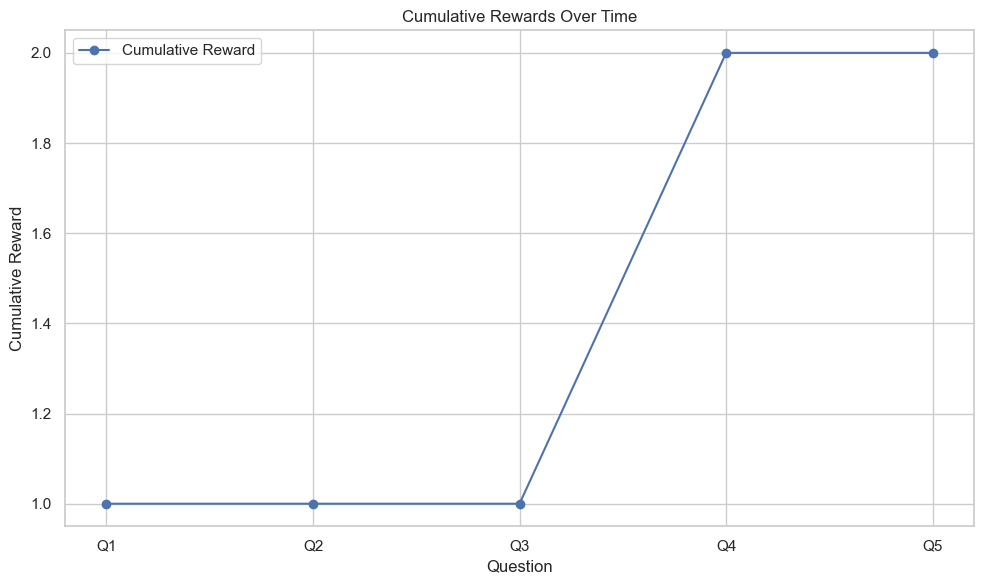

In [23]:



cumulative_rewards_over_time = []
cumulative_reward = 0
for q, response in zip(questions, user_responses):
    if response:
        cumulative_reward += agent.rewards[q]
    cumulative_rewards_over_time.append(cumulative_reward)


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(questions) + 1), cumulative_rewards_over_time, marker='o', linestyle='-', color='b', label='Cumulative Reward')
plt.title('Cumulative Rewards Over Time')
plt.xlabel('Question')
plt.ylabel('Cumulative Reward')
plt.xticks(range(1, len(questions) + 1), questions)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
